#### Importthe libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import datetime as dt

#### Read the data

In [2]:
bike_df = pd.read_csv('./day.csv')

#### Converting date to day
Month and Year are not required as they have been provided.

In [3]:
bike_df['day'] = bike_df['dteday'].apply(lambda x: dt.datetime.strptime(x, '%d-%m-%Y').day)
bike_df = bike_df.drop(['dteday'], axis=1)

In [4]:
# Pandas.DataFrame.nunique() function return Series with number of distinct observations over requested axis.
bike_df.nunique()

instant       730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
day            31
dtype: int64

Initializing variable for TARGET and binary so they can be easily be referenceable from the codes.

In [5]:
TARGET = 'cnt'

In [6]:
YESNO = ['yr','holiday','workingday']

In [7]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
 15  day         730 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 91.4 KB


#### Columns evaluation
Binary columns (with 0 & 1) are: yr, holiday, and working day

Columns that can turn into dummies variable is: weathsit

Columns that can turn into categorical are: 'season','mnth','yr','holiday','weekday','workingday','weathersit','day'

#### Change Data Categories
Convert numerical to categorical variables

In [8]:
category_cols=['season','mnth','yr','holiday','weekday','workingday','weathersit','day']
for col in category_cols:
  bike_df[col]=bike_df[col].astype('category')

Store categorical and numerical values inside variables so we can easily reference them

In [9]:
bike_categorical = bike_df.select_dtypes(include='category')
bike_numerical = bike_df.select_dtypes(include='number')

In [10]:
print("There are {} rows and {} columns in this data set.".format(bike_df.shape[0], bike_df.shape[1]))
print("There is {} categorical data and {} numerical data.".format(bike_categorical.shape[1], bike_numerical.shape[1]) )
print("There is {} missing data and {} duplicate values".format(bike_df.isnull().sum()[1].sum(), len(bike_df[bike_df.duplicated()])))
print("The Target variable is 'cnt'")

There are 730 rows and 16 columns in this data set.
There is 8 categorical data and 8 numerical data.
There is 0 missing data and 0 duplicate values
The Target variable is 'cnt'


### Exploratory Data Analysis (EDA)
#### Use boxplot to find correlations for categorical data set
There eight categorical variables.  Each one is plotted against the TARGET ('cnt') variable.

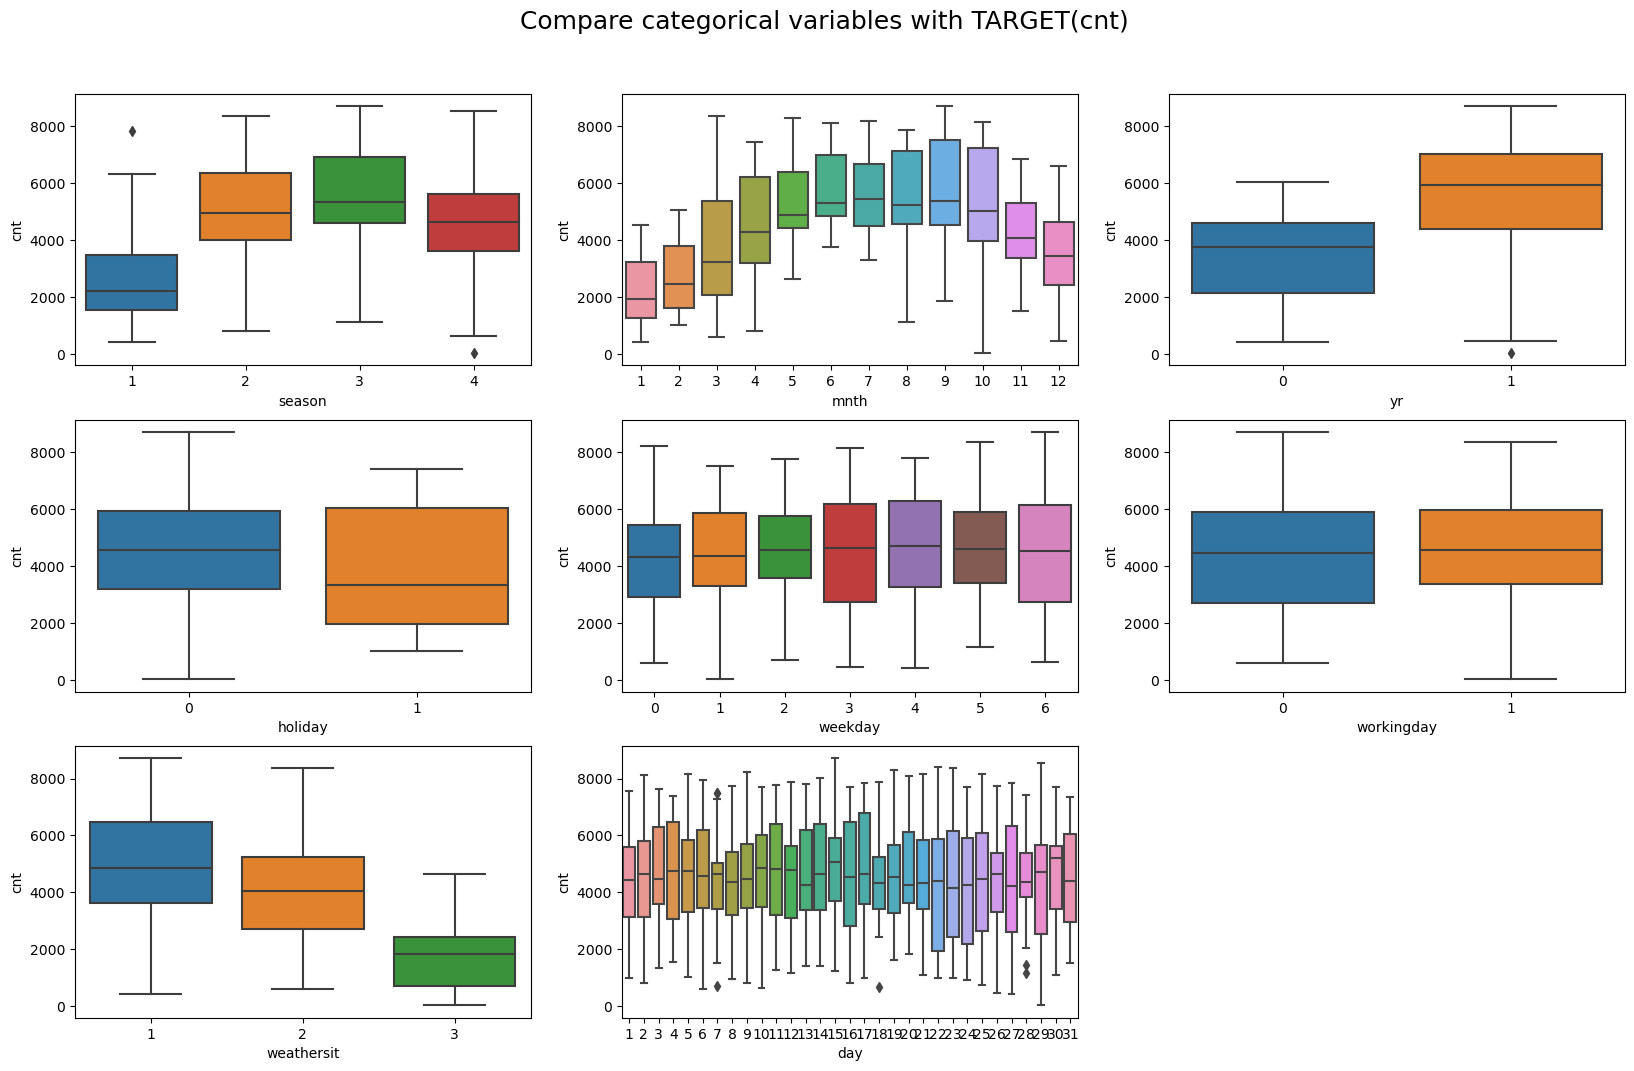

In [11]:
# set the figure sizes, spaces, and fontsize
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Compare categorical variables with TARGET(cnt)", fontsize=18, y=0.95)

# set number of columns (use 3 to demonstrate the change)
ncols = 3
# calculate number of rows
nrows = len(category_cols) // ncols + (len(category_cols) % ncols > 0)

for n, m in enumerate(bike_df[category_cols]):
    # add a new subplot iteratively using nrows and cols
    ax = plt.subplot(nrows, ncols, n + 1)

    # filter df and plot ticker on the new subplot axis
    sns.boxplot(x=bike_df[category_cols[n]], y=bike_df[TARGET], ax=ax)
    ax.set_xlabel(category_cols[n])

#### Analysis based on boxplot:
- Season: Falls has the highest bike rental counts. Spring has the lowest bike rental count.
- Month: More bike rentals occur between May and September
- Year: 2019 bike rental is higher than 2018 suggesting the trend it up.
- Holiday: non-holiday (0) has a wider range compared to holiday
- Weekday: Wednesday and Thursday appear to have more bike rental
- Workingday: inconclusive 
- Weathersit: Bike rental is high  when it is  Clear, Few clouds, Partly cloudy, Partly cloudy
- Day: It seems that bike rental occur more in the middle of the month

#### Use heatmap to find correlations for numerical data set

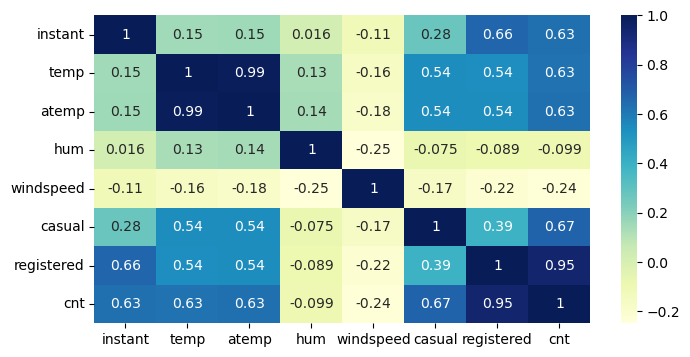

In [12]:
# set chart size, color and turn annotation on (numbers inside the chart)
plt.figure(figsize=(8,4))
sns.heatmap(bike_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

Dark blue represesnt high correlation.  Temperature, Registered and Casual users are among the highest in term of correlation. Let's view it in a different way that is a bit more easier to read.

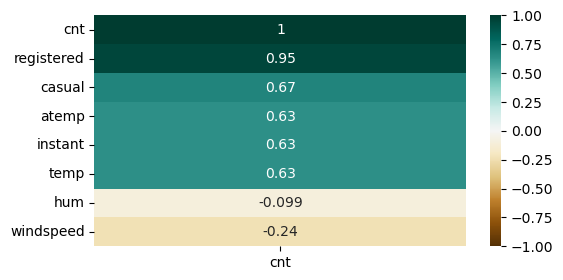

In [13]:
# Perform correlation against the TARGET ('cnt') variable
corr = bike_df.corr()
plt.figure(figsize=(6, 3))
sns.heatmap(corr[[TARGET]].sort_values(by=TARGET, ascending=False), vmin=-1, annot=True, cmap='BrBG');
corr_order = corr[[TARGET]].sort_values(by=TARGET, ascending=False).index

#### Using the positive correlated variables from above to plot against cnt.

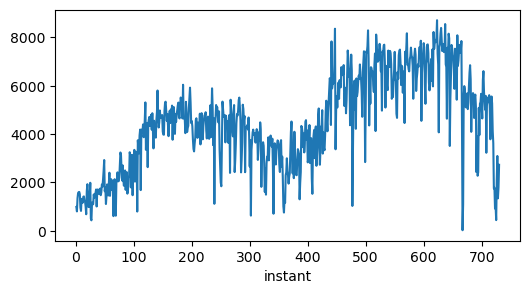

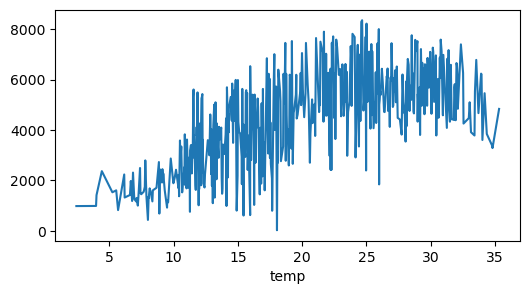

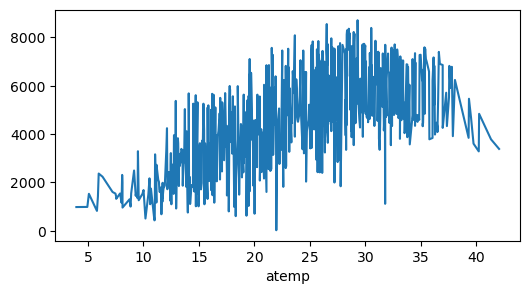

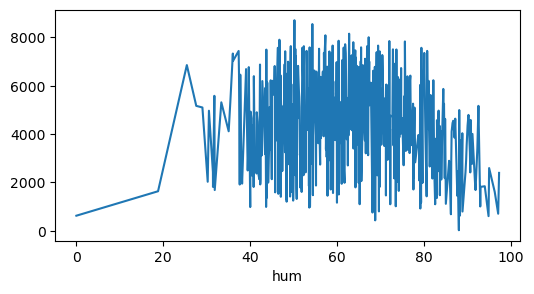

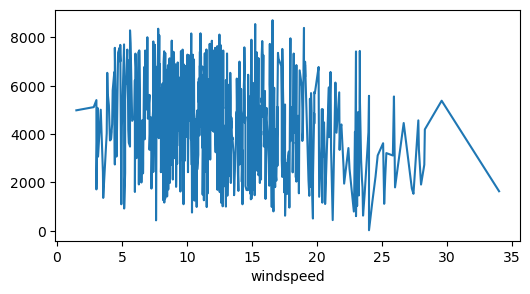

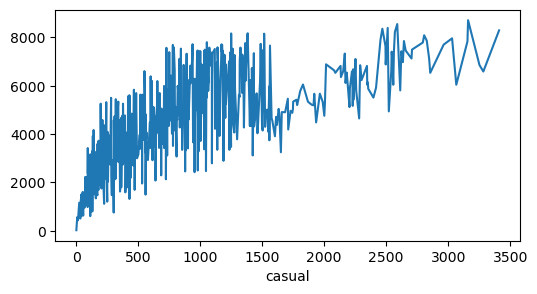

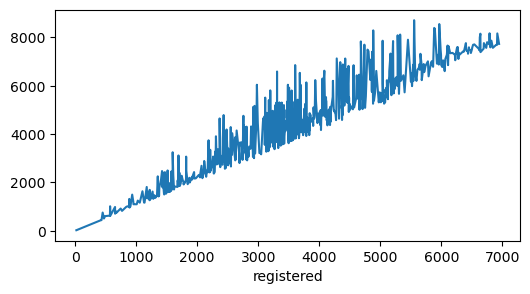

In [14]:
# plots to analyze the distribution of all numerical features
# for col in ['registered', 'casual', 'hum', 'windspeed','atemp', 'instant', 'temp','day']:
for col in bike_numerical:
    if col != TARGET:
      plt.figure(figsize=(6,3))
      bike_df.groupby(col).mean()[TARGET].plot()
      plt.xlabel(col)
plt.show()


We can clearly see casual and registered are in upward incline.  

In [15]:
#### Map out numerical assignment to human readable text

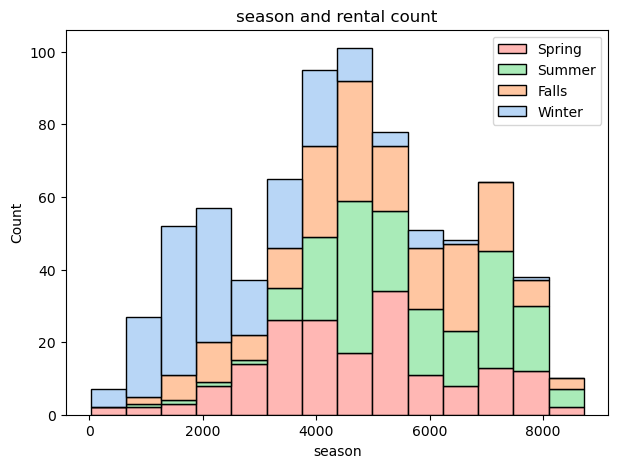

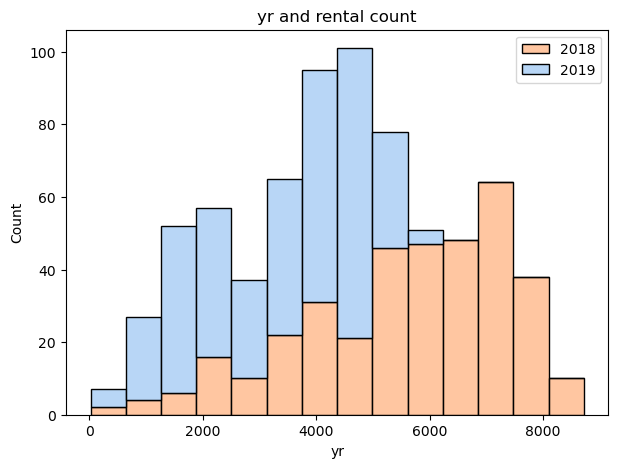

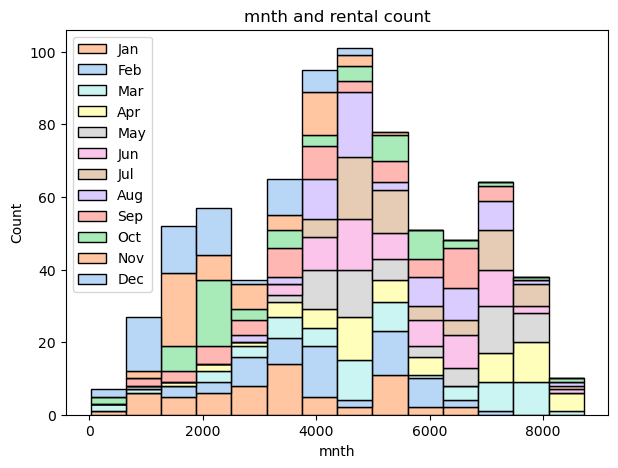

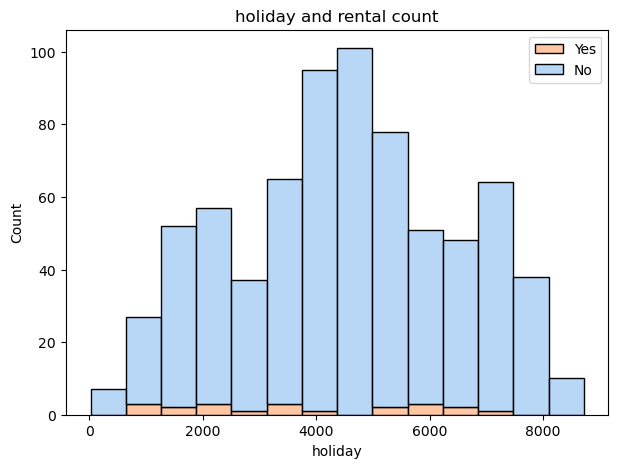

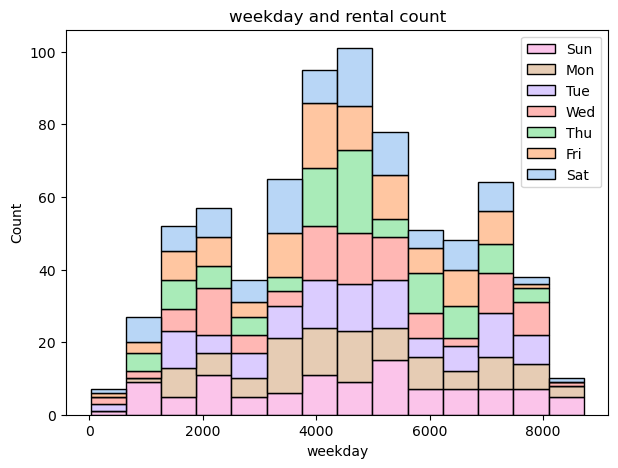

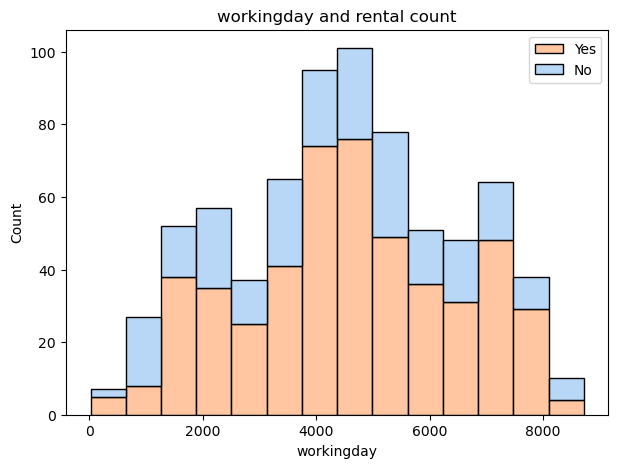

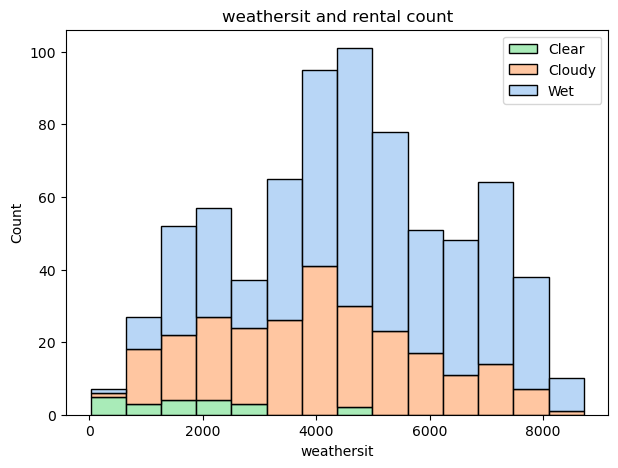

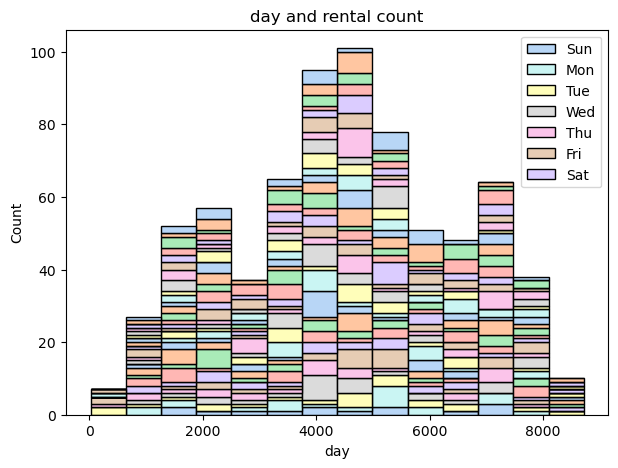

In [16]:
dictonary = {'season': ['Spring', 'Summer', 'Falls', 'Winter'],
             'yr': [2018, 2019],
             'mnth': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
             'holiday':['Yes','No'],
             'weekday':['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],
             'workingday':['Yes','No'],
             'weathersit':['Clear','Cloudy','Wet','Heavy Snow/Rain'],
             'day':['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
            }    

for k,v in dictonary.items():
    f = plt.figure(figsize=(7,5))
    ax = f.add_subplot(1,1,1)
    sns.histplot(data=bike_df, ax=ax, stat="count", multiple="stack",
                 x=TARGET,kde=False,
                 palette="pastel", hue=bike_df[k],
                 element="bars", legend=True)
    ax.set_title(f"{k}" " and rental count")
    ax.set_xlabel(k)
    ax.legend(v)
    ax.set_ylabel("Count")


#### Perform Simple Linear Regression
Quickly see which variable has positive impact on the model to be trained.

Based on the chart below, Registered is the most probable variable to be trained first.

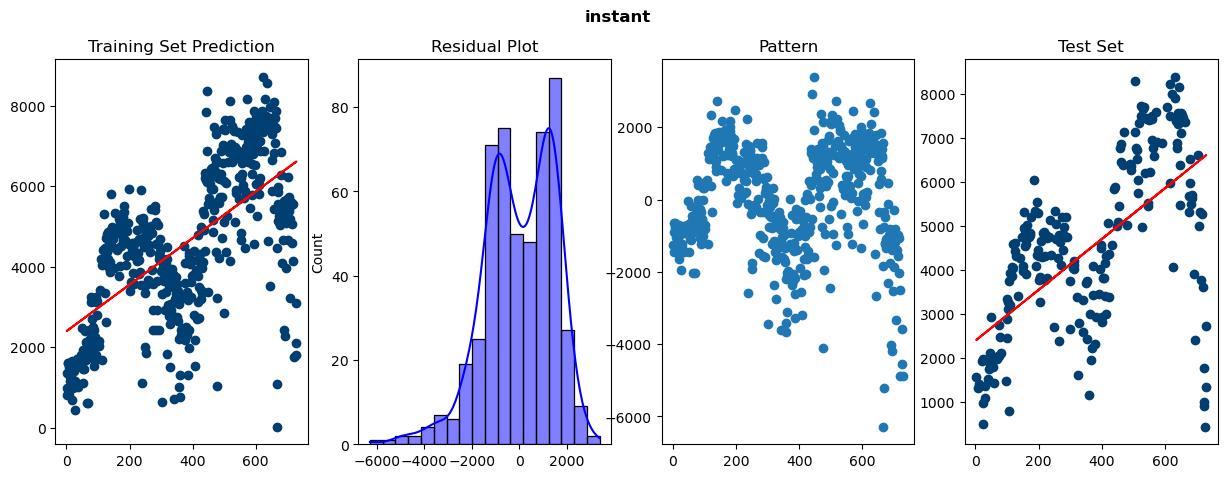

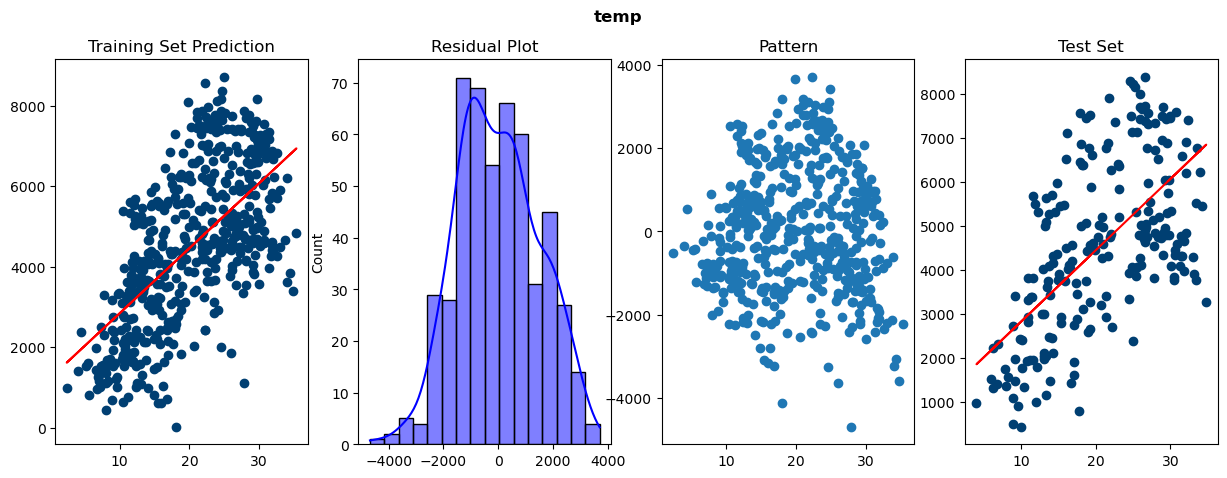

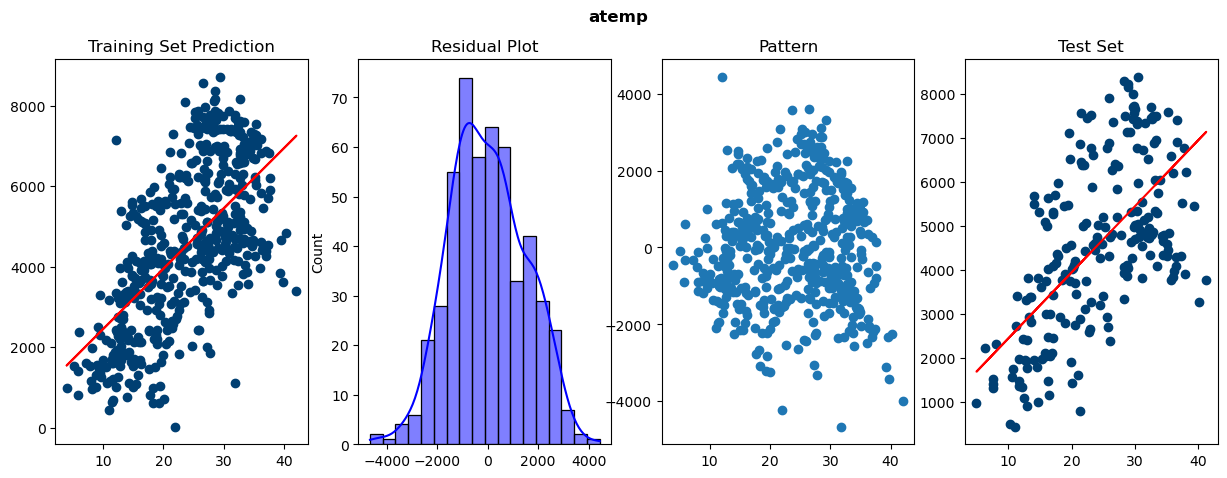

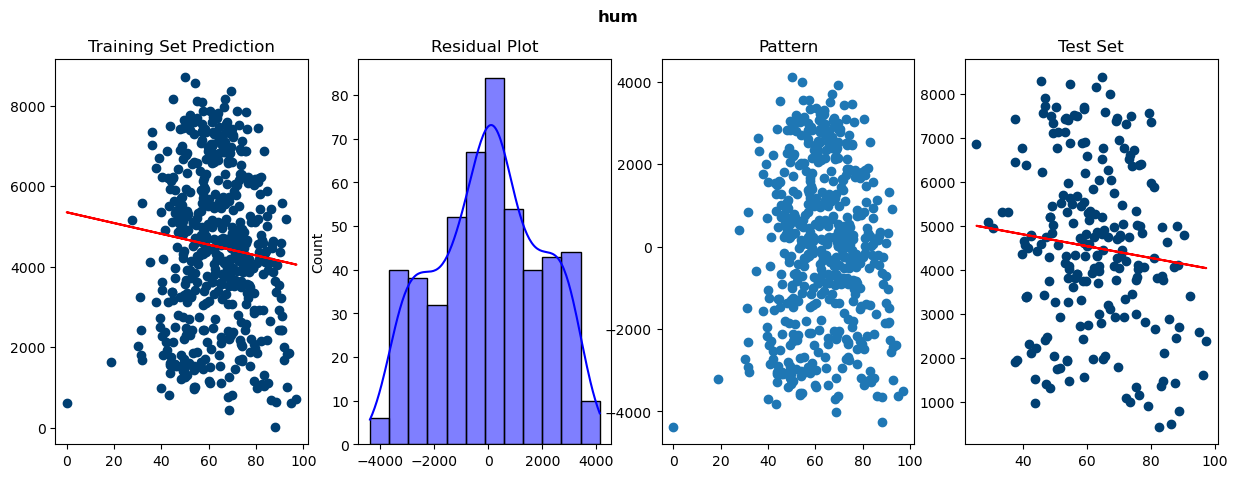

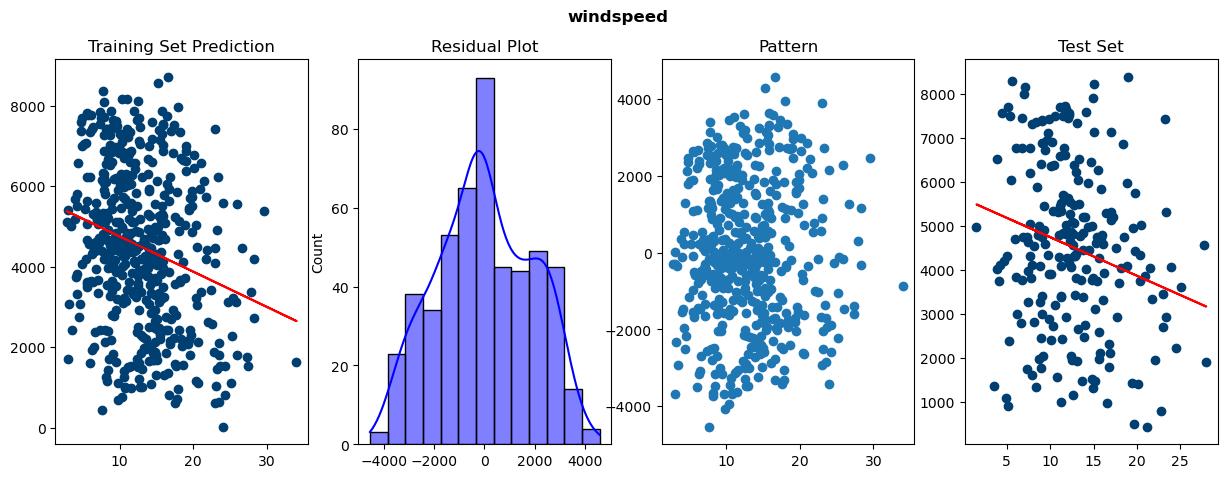

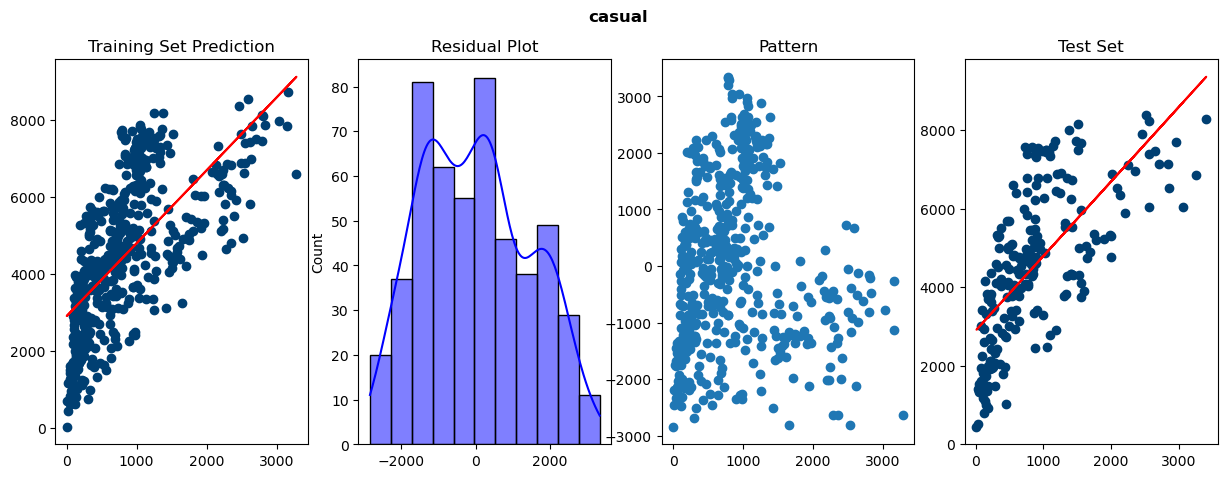

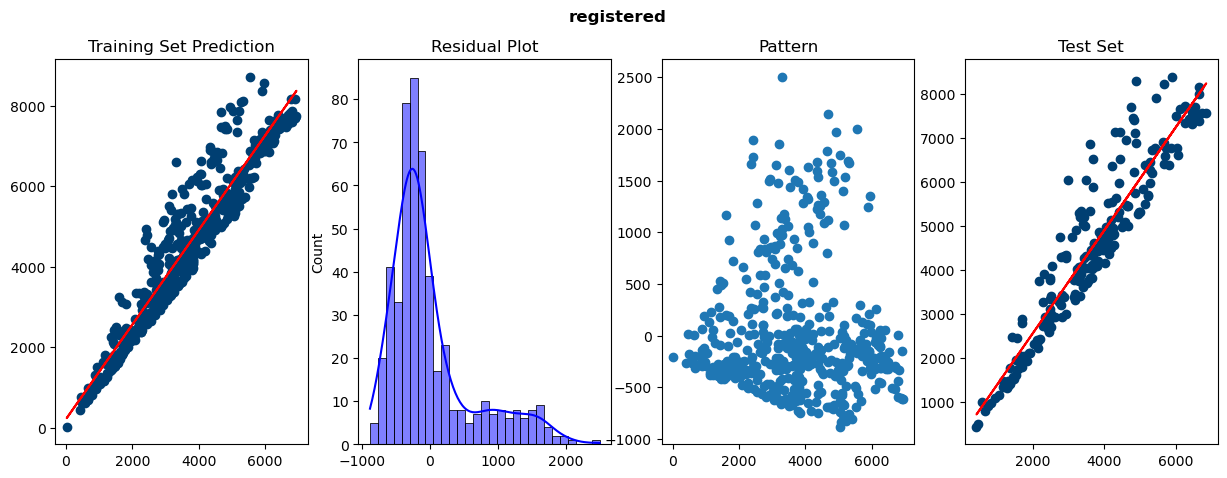

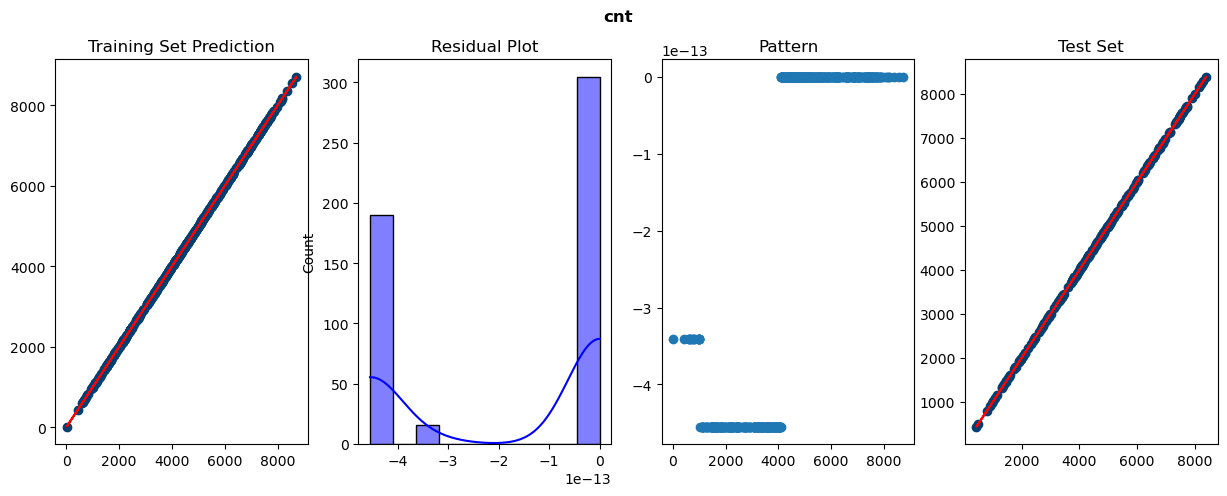

In [17]:
# making three copies of the dataframe as we'll be training multiple models
rfe_df = bike_df
mlr_df = bike_df
df2=bike_df
adv = bike_numerical
for i in adv:
    x = df2[i]
    y = df2[TARGET]
    m = (x.mean() * y.mean() - (x*y).mean())/((x.mean() * x.mean())-(x * x).mean())
    b = y.mean() - m*x.mean()
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=100)
    
    # train the model
    X_train_sm = sm.add_constant(X_train)
    lr =sm.OLS(y_train, X_train_sm)
    lr_model = lr.fit()

    # make prediction
    y_train_pred = lr_model.predict(X_train_sm)
    res = y_train - y_train_pred

    # plot the prediction in red  
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,5))
    fig.suptitle(i, fontweight ="bold")

    # plot training set
    ax1.scatter(X_train, y_train, color='#003F72')
    ax1.plot(X_train, b + m * X_train, 'r' )
    ax1.set_title("Training Set Prediction")
    
    # plot distribution for residual analysis
    sns.histplot(res, color='blue', kde=True, ax=ax2)
    ax2.set_title("Residual Plot")
    
    ax3.scatter(X_train, res)
    ax3.set_title("Pattern")
    
    # plot test set
    ax4.scatter(X_test, y_test, color='#003F72')
    ax4.plot(X_test, b + m * X_test, 'r' )
    ax4.set_title("Test Set")
    
    plt.show()

#### Multiple Linear Regression

##### Create dummy variables
Drop the original categorical data after concatenation.

In [18]:
DUMMIES = ['weathersit']
DUMMY_COLS = pd.get_dummies(bike_df[DUMMIES], drop_first=True)
bike_df = pd.concat([bike_df, DUMMY_COLS], axis=1)
bike_df = bike_df.drop(DUMMIES, axis=1)
bike_df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,weathersit_2,weathersit_3
0,1,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1,0
1,2,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,2,1,0
2,3,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,0,0
3,4,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,0,0
4,5,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,0,0


Some variables must be scaled for efficient training: temp, atemp, hum, windspeed, casual, registered, cnt

#### Train Test Split
We're using one of the clone dataframe (mlr_df). Split it into 70% train and 30% test.

In [19]:
mlr_train, mlr_test = train_test_split(mlr_df, train_size=0.7, random_state=100)
print(mlr_train.shape)
print(mlr_test.shape)

(510, 16)
(220, 16)


#### Scaling the data
Apply scaler() to all the columns except the 'YESNO' and 'DUMMIES' variables

Pre-processing the data is one of the most important steps during the creation of a machine learning model. This includes normalization, feature scaling, and feature extraction.

There are ways to improve the performance of your machine learning models and avoid the bad side effects of scaling.

The most common techniques used to scale features are standardization, normalization, and feature extraction.

In [20]:
EXCLUDE = pd.concat([bike_df[YESNO], bike_df[DUMMY_COLS.columns]], axis=1).columns
SCALED = bike_df.loc[:,~bike_df.columns.isin(EXCLUDE)]

In [21]:
# Scale the numerical data between 0 and 1
scaler = MinMaxScaler()

# Fit on data
mlr_train[SCALED.columns] = scaler.fit_transform(mlr_train[SCALED.columns])

In [22]:
mlr_train.describe()

,instant,season,mnth,weekday,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.505055,0.504575,0.503743,0.498366,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499,0.486405
std,0.287907,0.370078,0.315038,0.336182,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421,0.297061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255838,0.333333,0.181818,0.166667,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.233333
50%,0.510989,0.666667,0.545455,0.500000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638,0.500000
75%,0.757898,0.666667,0.818182,0.833333,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# Let's drop the TARGET variable and train the model
# X_train, y_train
y_train = mlr_train.pop(TARGET)
X_train = mlr_train

#### Createa functions so it can be re-used as we will manually add one variable at a time
This function takes two parameter input. x is the training set and m is the type of model we're training (i.e simple linear regression, multiple linear regression or Recursive Feature Elimination (RFE))

Variance Inflation Factors (VIF) measure how much the variance of the estimated regression coefficients are inflated as compared to when the predictor variables are not linearly related.

In [24]:
def train_model(x, m):
    # These global variables enable us to reference them outside of the function
    global lr_model, mlr_model, rfe_model
    global X_train_lr
    global X_train_mlr
    global X_train_rfe

    # Define Variance Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1]) if (x.shape[1]>0)]
    vif['VIF'] = round(vif['VIF'], 2)
    rfe_vif = vif.sort_values(by = "VIF", ascending=False)

    # Depending on user input, run one of the training jobs
    if m == mlr:
        X_train_mlr = sm.add_constant(x)
        mlr_model = sm.OLS(y_train, X_train_mlr).fit()
        return mlr_model.summary(), vif
    
    elif m == rfe:
        X_train_rfe = sm.add_constant(x)
        rfe_model = sm.OLS(y_train, X_train_rfe).fit()
        return rfe_model.summary(), vif
    
    if m == lr:
        X_train_lr = sm.add_constant(x)
        lr_model = sm.OLS(y_train, X_train_lr).fit()
        return mlr_model.summary(), vif
    
    else:
        print("Which model do you wish to train?")


In [25]:
# Create a one off VIF function in case we need to call it separately
def get_vif(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1]) if (x.shape[1]>0)]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending=False)
    return vif

Taking the cue from the Simple Linear Regression above, we see that Registered immediately get us 89.9% for R-squared while its p-value is zero.

In [26]:
print("The list of correlation in descending order: \n{}".format(corr_order))

The list of correlation in descending order: 
Index(['cnt', 'registered', 'casual', 'atemp', 'instant', 'temp', 'hum',
       'windspeed'],
      dtype='object')


### For the first model, we add one variable at a time in according with our correlation study above.

Lets ignore the TARGET variable and start training the model with next highest correlated variables.  Then, start add more variables.

In [27]:
# initialize the variable for our function above
lr, mlr, rfe = 0, 0, 0

In [28]:
# build a model with one variables. Corr study shows that registered has the highest corr
X_train_sm = sm.add_constant(X_train['registered'])
train_model(X_train_sm, mlr)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       0.899
 Model:                            OLS   Adj. R-squared:                  0.899
 Method:                 Least Squares   F-statistic:                     4536.
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):          2.26e-255
 Time:                        21:24:13   Log-Likelihood:                 624.25
 No. Observations:                 510   AIC:                            -1244.
 Df Residuals:                     508   BIC:                            -1236.
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

R-squared is 89.9% with just one variable added.  P-Value is zero.

Lets add first two highest correlated variable at once.

In [29]:
X_train_sm = sm.add_constant(X_train[['registered','casual']])
train_model(X_train_sm, mlr)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 3.852e+32
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:13   Log-Likelihood:                 17760.
 No. Observations:                 510   AIC:                        -3.551e+04
 Df Residuals:                     507   BIC:                        -3.550e+04
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

After adding two variables ('registered', and 'casual'), we're able to get 1.0 for R-squared and p-values are all zero, insignificant.
#### Lets add all the variables
Then, we'll try to remove one variable at a time.

In [30]:
X_train_lm = sm.add_constant(X_train)
train_model(X_train_lm, mlr)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 5.973e+28
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:13   Log-Likelihood:                 16044.
 No. Observations:                 510   AIC:                        -3.206e+04
 Df Residuals:                     494   BIC:                        -3.199e+04
 Df Model:                          15                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

After we added all variables, many of the p-values became significantly high.  The VIF is also high.  Let's remove one variable at a time starting with the highest value of both VIF and p-value.

Between the VIF and p-value, 'instant' should be dropped first as it has the highest values.

In [31]:
# drop and train
X = X_train.drop('instant', axis=1)
# train_model(X, mlr)
train_model(X, mlr)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 4.426e+28
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:13   Log-Likelihood:                 15949.
 No. Observations:                 510   AIC:                        -3.187e+04
 Df Residuals:                     495   BIC:                        -3.181e+04
 Df Model:                          14                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [32]:
# Looks like temp and atemp are high.  Let's drop atemp first.
X = X.drop('atemp', axis=1)
train_model(X, mlr)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 2.619e+28
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:13   Log-Likelihood:                 15796.
 No. Observations:                 510   AIC:                        -3.156e+04
 Df Residuals:                     496   BIC:                        -3.151e+04
 Df Model:                          13                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [33]:
# humidy (hum) is the next highest on the list so we'll drop it next
X = X.drop('hum', axis=1)
train_model(X, mlr)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 5.131e+30
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:13   Log-Likelihood:                 17121.
 No. Observations:                 510   AIC:                        -3.422e+04
 Df Residuals:                     497   BIC:                        -3.416e+04
 Df Model:                          12                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

X4 = X3.drop('temp', axis=1)
X_train_lm = sm.add_constant(X4)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

In [34]:
# change from mnth to workingday
X = X.drop('workingday', axis=1)
train_model(X,mlr)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 6.077e+29
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:13   Log-Likelihood:                 16554.
 No. Observations:                 510   AIC:                        -3.308e+04
 Df Residuals:                     498   BIC:                        -3.303e+04
 Df Model:                          11                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [35]:
#change from workingday to holiday
X = X.drop('holiday', axis=1)
train_model(X, mlr)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 3.775e+30
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:13   Log-Likelihood:                 16995.
 No. Observations:                 510   AIC:                        -3.397e+04
 Df Residuals:                     499   BIC:                        -3.392e+04
 Df Model:                          10                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [36]:
X = X.drop('windspeed', axis=1)
train_model(X,mlr)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 6.601e+29
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:13   Log-Likelihood:                 16523.
 No. Observations:                 510   AIC:                        -3.303e+04
 Df Residuals:                     500   BIC:                        -3.298e+04
 Df Model:                           9                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [37]:
#changefrom temp to weekday
X = X.drop('weekday', axis=1)
train_model(X, mlr)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 5.936e+29
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:13   Log-Likelihood:                 16466.
 No. Observations:                 510   AIC:                        -3.291e+04
 Df Residuals:                     501   BIC:                        -3.288e+04
 Df Model:                           8                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [38]:
# change from holiday to temp
X = X.drop('temp', axis=1)
train_model(X, mlr)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 5.071e+29
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:13   Log-Likelihood:                 16391.
 No. Observations:                 510   AIC:                        -3.277e+04
 Df Residuals:                     502   BIC:                        -3.273e+04
 Df Model:                           7                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [39]:
# change from season to mnth
X = X.drop('mnth', axis=1)
train_model(X,mlr)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 3.879e+29
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:13   Log-Likelihood:                 16283.
 No. Observations:                 510   AIC:                        -3.255e+04
 Df Residuals:                     503   BIC:                        -3.252e+04
 Df Model:                           6                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [40]:
# change from weekday to yr
X = X.drop('yr', axis=1)
train_model(X,mlr)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 5.676e+31
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:13   Log-Likelihood:                 17507.
 No. Observations:                 510   AIC:                        -3.500e+04
 Df Residuals:                     504   BIC:                        -3.498e+04
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [41]:
# change from day to weathersit
X = X.drop('weathersit', axis=1)
train_model(X,mlr)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 2.117e+31
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:13   Log-Likelihood:                 17198.
 No. Observations:                 510   AIC:                        -3.439e+04
 Df Residuals:                     505   BIC:                        -3.437e+04
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

Now,the R-squared is still 1, but the p-values have dropped to ~0.006.  We can continue to drop. However, this is enough. I think you get the point by now.

#### Perform Residual Analysis
Residuals is the difference between actual values and predicted values

In [42]:
y_train_predict = mlr_model.predict(X_train_mlr)

In [43]:
y_train_predict.shape

(510,)

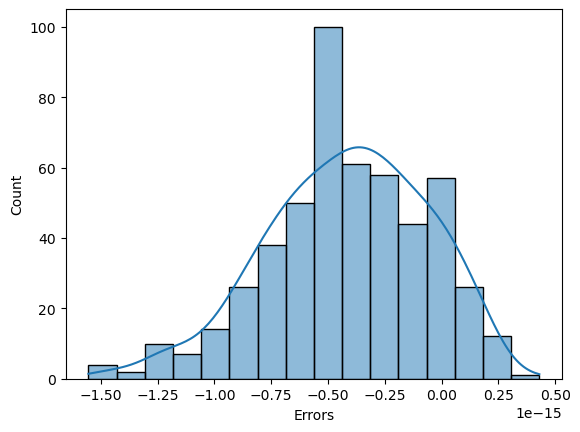

In [44]:
res = y_train - y_train_predict
sns.histplot(res, kde=True)
plt.xlabel('Errors');

#### Making Prediction

In [45]:
mlr_test[SCALED.columns] = scaler.transform(mlr_test[SCALED.columns])

In [46]:
mlr_test.shape

(220, 16)

In [47]:
y_test = mlr_test.pop(TARGET)
X_test = mlr_test

In [48]:
X_test.shape

(220, 15)

In [49]:
X_test.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'day'],
      dtype='object')

#### Dividing into X_test and y_test
In this section, we'll test to see how our model performed.

In [50]:
# Adding constant variable to test dataframe
X_test_model = sm.add_constant(X_test)

In [51]:
X_test.shape

(220, 15)

In [52]:
X_test_model = X_test_model.drop(['instant','atemp','mnth','weekday','hum','workingday','temp','season','day','holiday','windspeed'], axis=1)

In [53]:
X_test_model.shape

(220, 5)

In [54]:
X_test_model.columns

Index(['const', 'yr', 'weathersit', 'casual', 'registered'], dtype='object')

In [55]:
# Making predictions using the fourth model

y_test_pred = mlr_model.predict(X_test_model)

#### Model Evaluation

Text(0, 0.5, 'y_pred')

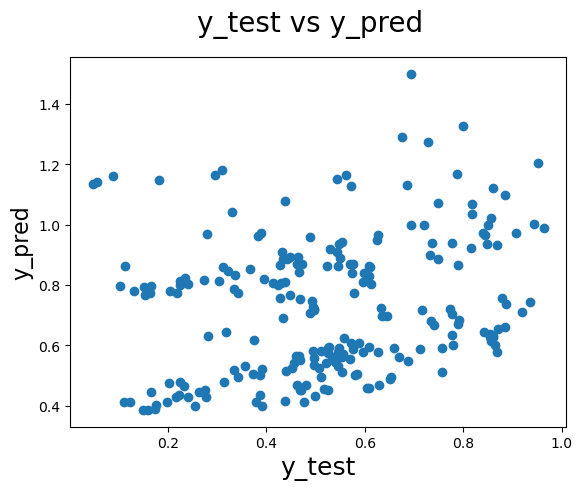

In [56]:
# Plotting y_test and y_pred_model to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [57]:
# evaluate the model
r2_score(y_true=y_test, y_pred=y_test_pred)

-1.5044368268623898

R2 has no such thing as “the square of something.” It could be positive, negative or zero, depending on

r2 is negative only when a chosen model does not follow the trend of the data.

This model seems to be performing better than the others because it's been over-fitted.

### For the second model, we use Recursive Feature Elimination (RFE)

In [58]:
# The dummy variable is still the same. This time, we'll use an clone of the dataframe, rfe_df.
DUMMIES = ['weathersit']
DUMMY_COLS = pd.get_dummies(rfe_df[DUMMIES], drop_first=True)
rfe_df = pd.concat([rfe_df, DUMMY_COLS], axis=1)
rfe_df = rfe_df.drop(DUMMIES, axis=1)
rfe_df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,weathersit_2,weathersit_3
0,1,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1,0
1,2,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,2,1,0
2,3,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,0,0
3,4,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,0,0
4,5,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,0,0


#### Train Test Split

In [59]:
# We'll do a train, test split like before
rfe_train, rfe_test = train_test_split(rfe_df, train_size=0.7, random_state=100)
print(rfe_train.shape)
print(rfe_test.shape)

(510, 17)
(220, 17)


#### Scaling the data
Apply scaler() to all the columns except the 'YESNO' and 'DUMMIES' variables


In [60]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [61]:
EXCLUDE = pd.concat([rfe_df[YESNO], rfe_df[DUMMY_COLS.columns]], axis=1).columns
SCALED = rfe_df.loc[:,~rfe_df.columns.isin(EXCLUDE)]

In [62]:
#1 Scale the numerical data
scaler = MinMaxScaler()

#2. Fit on data
rfe_train[SCALED.columns] = scaler.fit_transform(rfe_train[SCALED.columns])

In [63]:
# Now all variables are normalized between 0 and 1
rfe_train.describe()

,instant,season,mnth,weekday,temp,atemp,hum,windspeed,casual,registered,cnt,day,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.505055,0.504575,0.503743,0.498366,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499,0.486405,0.345098,0.029412
std,0.287907,0.370078,0.315038,0.336182,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421,0.297061,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255838,0.333333,0.181818,0.166667,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.233333,0.000000,0.000000
50%,0.510989,0.666667,0.545455,0.500000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638,0.500000,0.000000,0.000000
75%,0.757898,0.666667,0.818182,0.833333,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,0.733333,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
# Let's drop the TARGET variable and train our model
# X_train, y_train
y_train = rfe_train.pop(TARGET)
X_train = rfe_train

In [65]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [66]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('instant', True, 1),
 ('season', True, 1),
 ('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', False, 3),
 ('weekday', False, 2),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 6),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('day', False, 5),
 ('weathersit_2', False, 4),
 ('weathersit_3', True, 1)]

RFE automatically select variables for us.  They are identified as True and 1.  Also, refer to rfe.support_ below for the list.

In [67]:
# Here are the 10 features that we asked RFE to select for us
col = X_train.columns[rfe.support_]
col

Index(['instant', 'season', 'yr', 'mnth', 'temp', 'atemp', 'windspeed',
       'casual', 'registered', 'weathersit_3'],
      dtype='object')

In [68]:
X_train.columns[~rfe.support_]

Index(['holiday', 'weekday', 'workingday', 'hum', 'day', 'weathersit_2'], dtype='object')

Let's train our RFE model using the suggested rfe.support_ columns.

In [69]:
# We're going to manual train the model to initialize the variables.  Then, we'll use our prebuilt function above.
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
rfe_model = sm.OLS(y_train, X_train_rfe).fit()
X_train_new = X_train_rfe
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.909e+31
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:24:14   Log-Likelihood:                 17649.
No. Observations:                 510   AIC:                        -3.528e+04
Df Residuals:                     499   BIC:                        -3.523e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.539e-16   4.51e-17      7.853      0.000    2.65e-16    4.42e-16
instant      -1.443e-15    8.3e-16     -1.739      0.083   -3.07e-15    1.87e-16
season        1.084e-16   5.61e-17      1.932      0.054   -1.82e-18    2.19e-16
yr            7.216e-16   4.17e-16      1.729      0.084   -9.83e-17    1.54e-15
mnth         -5.551e-17   3.85e-16     -0.144      0.885   -8.12e-16    7.01e-16
temp           1.11e-16   3.19e-16      0.348      0.728   -5.15e-16    7.37e-16
atemp         -1.11e-16    3.4e-16     -0.326      0.744   -7.79e-16    5.57e-16
windspeed     2.776e-16   6.42e-17      4.321      0.000    1.51e-16    4.04e-16
casual           0.3775   6.28e-17   6.01e+15      0.000       0.377       0.377
registered       0.7968   8.53e-17   9.34e+15      0.000       0.797       0.797
weathersit_3  -7.98e-17   6.54e-17     -1.221      0.223   -2.08e-16    4.86e-17
==============================================================================
Omnibus:                      103.948   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.488
Skew:                           0.035   Prob(JB):                     2.16e-05
Kurtosis:                       1.997   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Right of the bat, R-squared is 1.0.  However, the p-values are not in the ideal place.  We need to drop one variable and train.  Rinse and repeat until p-values are significantly below 0.05 or so. 

#### Drop a variable based on highest VIF and high p-value and train the model.
Repeat the process until p-values are below 0.05

In [70]:
# mnth is the highest so we drop it first
X_train_new = X_train_new.drop(['mnth'],axis=1)
train_model(X_train_new, rfe)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 9.220e+30
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:14   Log-Likelihood:                 17196.
 No. Observations:                 510   AIC:                        -3.437e+04
 Df Residuals:                     500   BIC:                        -3.433e+04
 Df Model:                           9                                         
 Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------------

In [71]:
# this time atemp is the highest for both pvalue and VIF. Let's drop it.
X_train_new = X_train_new.drop(['atemp'],axis=1)
train_model(X_train_new, rfe)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 4.709e+31
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:14   Log-Likelihood:                 17581.
 No. Observations:                 510   AIC:                        -3.514e+04
 Df Residuals:                     501   BIC:                        -3.511e+04
 Df Model:                           8                                         
 Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------------

In [72]:
#season is the next highest, drop it
X_train_new = X_train_new.drop(['season'],axis=1)
train_model(X_train_new, rfe)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 2.664e+31
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:14   Log-Likelihood:                 17401.
 No. Observations:                 510   AIC:                        -3.479e+04
 Df Residuals:                     502   BIC:                        -3.475e+04
 Df Model:                           7                                         
 Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------------

In [73]:
X_train_new = X_train_new.drop(['instant'],axis=1)
train_model(X_train_new,rfe)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 2.632e+31
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:14   Log-Likelihood:                 17358.
 No. Observations:                 510   AIC:                        -3.470e+04
 Df Residuals:                     503   BIC:                        -3.467e+04
 Df Model:                           6                                         
 Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------------

In [74]:
# everything else looks good except for weathersit_3, drop it.
X_train_new = X_train_new.drop(['weathersit_3'],axis=1)
train_model(X_train_new,rfe)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 4.258e+31
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:14   Log-Likelihood:                 17434.
 No. Observations:                 510   AIC:                        -3.486e+04
 Df Residuals:                     504   BIC:                        -3.483e+04
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [75]:
X_train_new = X_train_new.drop(['temp'],axis=1)
train_model(X_train_new,rfe)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 8.536e+31
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:14   Log-Likelihood:                 17554.
 No. Observations:                 510   AIC:                        -3.510e+04
 Df Residuals:                     505   BIC:                        -3.508e+04
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [76]:
X_train_new = X_train_new.drop(['yr'],axis=1)
train_model(X_train_new,rfe)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 1.306e+32
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:14   Log-Likelihood:                 17589.
 No. Observations:                 510   AIC:                        -3.517e+04
 Df Residuals:                     506   BIC:                        -3.515e+04
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [77]:
X_train_new = X_train_new.drop(['const'],axis=1)
train_model(X_train_new,rfe)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 1.306e+32
 Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
 Time:                        21:24:14   Log-Likelihood:                 17589.
 No. Observations:                 510   AIC:                        -3.517e+04
 Df Residuals:                     506   BIC:                        -3.515e+04
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

#### Residual Analysis of the trained data

In [78]:
y_train_pred = rfe_model.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

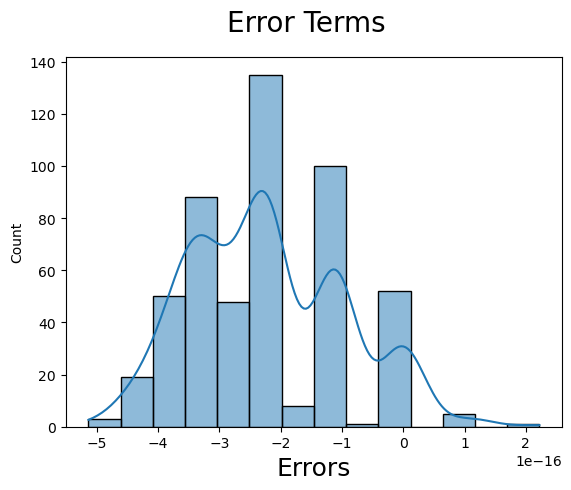

In [79]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot(y_train - y_train_pred, kde=True)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Making Predictions
Applying scaling on the test data

In [80]:
rfe_test[SCALED.columns] = scaler.transform(rfe_test[SCALED.columns])

In [81]:
y_test = rfe_test.pop(TARGET)
X_test = rfe_test

In [82]:
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [83]:
print("X_test_new.shape: {}".format(X_test_new.shape))
print("X_train_new: {}".format(X_train_new.shape))

X_test_new.shape: (220, 4)
X_train_new: (510, 3)


In [84]:
# Making predictions
y_pred = rfe_model.predict(X_test_new)

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_pred')

In [ ]:
# evaluate the model
r2_score(y_true=y_test, y_pred=y_pred)